In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Label_encoded.xlsx')
data.head()

,Unnamed: 0,Account,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,le_texts
0,0,Konex,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,"146, 59, 87, 66, 15, 72, 115, 112, 39, 63, 36,..."
1,1,Finjob,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,"85, 153, 12, 62, 165, 113, 33"
2,2,Kinnamplus,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,"35, 2, 148, 27, 43, 0, 96, 100, 132, 116, 138,..."
3,3,Genco Pura Olive Oil Company,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,"52, 37, 150, 118, 99, 133, 42"
4,4,Initech,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,"102, 119, 171, 157, 148"


In [3]:
data.columns

Index(['Unnamed: 0', 'Account', 'SalesAgentEmailID', 'ContactEmailID',
       'Deal_Stage', 'Product', 'Close_Value', 'Created Date', 'Close Date',
       'DateDiff', 'le_texts'],
      dtype='object')

In [4]:
data = data[['Account', 'SalesAgentEmailID', 'ContactEmailID', \
           'Deal_Stage', 'Product', 'Close_Value', 'Created Date', 'Close Date', 'DateDiff', 'le_texts']]
data.head()

,Account,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,le_texts
0,Konex,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,"146, 59, 87, 66, 15, 72, 115, 112, 39, 63, 36,..."
1,Finjob,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,"85, 153, 12, 62, 165, 113, 33"
2,Kinnamplus,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,"35, 2, 148, 27, 43, 0, 96, 100, 132, 116, 138,..."
3,Genco Pura Olive Oil Company,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,"52, 37, 150, 118, 99, 133, 42"
4,Initech,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,"102, 119, 171, 157, 148"


In [32]:
df = data.dropna()
df = df[df['Deal_Stage'] != 'In Progress']
print(df.shape)
df.head()

(6489, 10)


,Account,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,le_texts
0,Konex,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,"146, 59, 87, 66, 15, 72, 115, 112, 39, 63, 36,..."
1,Finjob,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,"85, 153, 12, 62, 165, 113, 33"
2,Kinnamplus,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,"35, 2, 148, 27, 43, 0, 96, 100, 132, 116, 138,..."
4,Initech,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,"102, 119, 171, 157, 148"
6,Hatfan,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,2016-01-08,2016-12-08,335,"123, 46, 13, 177, 135, 155, 37, 176, 21, 105, ..."


In [33]:
df.insert(10, 'count', 0)
for i in range(df.shape[0]):
    texts = str(df.iloc[i]['le_texts']).split(', ')
    df.iat[i, 10] = len(texts)
df.head()

,Account,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,le_texts,count
0,Konex,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,"146, 59, 87, 66, 15, 72, 115, 112, 39, 63, 36,...",28
1,Finjob,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,"85, 153, 12, 62, 165, 113, 33",7
2,Kinnamplus,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,"35, 2, 148, 27, 43, 0, 96, 100, 132, 116, 138,...",15
4,Initech,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,"102, 119, 171, 157, 148",5
6,Hatfan,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,2016-01-08,2016-12-08,335,"123, 46, 13, 177, 135, 155, 37, 176, 21, 105, ...",28


In [43]:
df.insert(4, 'Stage_BN', 0)
for i in range(df.shape[0]):
    stage = str(df.iloc[i]['Deal_Stage'])
    if stage == 'Won':
        df.iat[i, 4] = 1
    else:
        df.iat[i, 4] = 0
df.head()

,Account,SalesAgentEmailID,ContactEmailID,Deal_Stage,Stage_BN,Product,Close_Value,Created Date,Close Date,DateDiff,le_texts,count
0,Konex,corliss@piedpiper.com,delila@konex.com,Won,1,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,"146, 59, 87, 66, 15, 72, 115, 112, 39, 63, 36,...",28
1,Finjob,rosalina@piedpiper.com,belinda@finjob.com,Won,1,MG Special,45,2016-01-04,2016-11-02,303,"85, 153, 12, 62, 165, 113, 33",7
2,Kinnamplus,donn@piedpiper.com,monte@kinnamplus.com,Lost,0,MG Special,1054,2016-01-06,2016-12-07,336,"35, 2, 148, 27, 43, 0, 96, 100, 132, 116, 138,...",15
4,Initech,wilburn@piedpiper.com,alejandro@initech.com,Lost,0,MG Advanced,517,2016-01-06,2016-09-18,256,"102, 119, 171, 157, 148",5
6,Hatfan,zane@piedpiper.com,tyron@hatfan.com,Won,1,GTX Basic,517,2016-01-08,2016-12-08,335,"123, 46, 13, 177, 135, 155, 37, 176, 21, 105, ...",28


# Text Data Preparation

In [6]:
import tensorflow as tf
import string
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.3.0


In [44]:
np.mean(df['count'])

25.88580674988442

In [45]:
df.shape

(6489, 12)

In [46]:
extra = np.array([0]*25)
extra

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [47]:
text = list(map(int, str(df.iloc[1]['le_texts']).split(', ')))
text

[85, 153, 12, 62, 165, 113, 33]

In [48]:
arr = np.concatenate((text, extra))[:25]
arr

array([ 85, 153,  12,  62, 165, 113,  33,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [49]:
def get_padded(text):
    extra = np.array([0]*25)
    text = list(map(int, str(text).split(', ')))
    arr = np.concatenate((text, extra))[:25]
    return arr

In [50]:
get_padded('85, 153,  12,  62, 165, 113,  33')

array([ 85, 153,  12,  62, 165, 113,  33,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

# Extra Data Preparation

In [65]:
acc_oh = pd.get_dummies(df['Account'], prefix='account=')
acc_oh.head()

,account=_Acme Corporation,account=_Betasoloin,account=_Betatech,account=_Bioholding,account=_Bioplex,account=_Blackzim,account=_Bluth Company,account=_Bubba Gump,account=_Cancity,account=_Cheers,...,account=_Xx-holding,account=_Xx-zobam,account=_Y-corporation,account=_Yearin,account=_Zathunicon,account=_Zencorporation,account=_Zoomit,account=_Zotware,account=_Zumgoity,account=_dambase
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
acc_oh.shape

(6489, 85)

In [72]:
df.shape

(6489, 12)

In [73]:
df_oh = pd.concat([df, acc_oh], axis=1)
df_oh

,Account,SalesAgentEmailID,ContactEmailID,Deal_Stage,Stage_BN,Product,Close_Value,Created Date,Close Date,DateDiff,...,account=_Xx-holding,account=_Xx-zobam,account=_Y-corporation,account=_Yearin,account=_Zathunicon,account=_Zencorporation,account=_Zoomit,account=_Zotware,account=_Zumgoity,account=_dambase
0,Konex,corliss@piedpiper.com,delila@konex.com,Won,1,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,...,0,0,0,0,0,0,0,0,0,0
1,Finjob,rosalina@piedpiper.com,belinda@finjob.com,Won,1,MG Special,45,2016-01-04,2016-11-02,303,...,0,0,0,0,0,0,0,0,0,0
2,Kinnamplus,donn@piedpiper.com,monte@kinnamplus.com,Lost,0,MG Special,1054,2016-01-06,2016-12-07,336,...,0,0,0,0,0,0,0,0,0,0
4,Initech,wilburn@piedpiper.com,alejandro@initech.com,Lost,0,MG Advanced,517,2016-01-06,2016-09-18,256,...,0,0,0,0,0,0,0,0,0,0
6,Hatfan,zane@piedpiper.com,tyron@hatfan.com,Won,1,GTX Basic,517,2016-01-08,2016-12-08,335,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,Ganjaflex,reed@piedpiper.com,somer@ganjaflex.com,Won,1,GTX Basic,555,2017-12-31,2018-08-29,241,...,0,0,0,0,0,0,0,0,0,0
8296,Inity,darcel@piedpiper.com,palmira@inity.com,Lost,0,GTX Plus Pro,5169,2017-12-31,2018-07-10,191,...,0,0,0,0,0,0,0,0,0,0
8297,Green-Plus,vicki@piedpiper.com,lavone@green-plus.com,Lost,0,MG Special,4631,2017-12-31,2019-10-04,642,...,0,0,0,0,0,0,0,0,0,0
8298,Inity,darcel@piedpiper.com,palmira@inity.com,Won,1,GTX Plus Pro,4880,2017-12-31,2018-02-06,37,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df_oh.iloc[0]['account=_Konex']

1

# Train Test Split

In [75]:
df_oh.columns

Index(['Account', 'SalesAgentEmailID', 'ContactEmailID', 'Deal_Stage',
       'Stage_BN', 'Product', 'Close_Value', 'Created Date', 'Close Date',
       'DateDiff', 'le_texts', 'count', 'account=_Acme Corporation',
       'account=_Betasoloin', 'account=_Betatech', 'account=_Bioholding',
       'account=_Bioplex', 'account=_Blackzim', 'account=_Bluth Company',
       'account=_Bubba Gump', 'account=_Cancity', 'account=_Cheers',
       'account=_Codehow', 'account=_Condax', 'account=_Conecom',
       'account=_Dalttechnology', 'account=_Domzoom', 'account=_Doncon',
       'account=_Donquadtech', 'account=_Dontechi', 'account=_Donware',
       'account=_Fasehatice', 'account=_Faxquote', 'account=_Finhigh',
       'account=_Finjob', 'account=_Funholding', 'account=_Ganjaflex',
       'account=_Gekko & Co', 'account=_Genco Pura Olive Oil Company',
       'account=_Globex Corporation', 'account=_Gogozoom', 'account=_Golddex',
       'account=_Goodsilron', 'account=_Green-Plus', 'account=_Gr

In [78]:
df_oh.columns[:12]

Index(['Account', 'SalesAgentEmailID', 'ContactEmailID', 'Deal_Stage',
       'Stage_BN', 'Product', 'Close_Value', 'Created Date', 'Close Date',
       'DateDiff', 'le_texts', 'count'],
      dtype='object')

In [86]:
list(df_oh.columns[12:])

['account=_Acme Corporation',
 'account=_Betasoloin',
 'account=_Betatech',
 'account=_Bioholding',
 'account=_Bioplex',
 'account=_Blackzim',
 'account=_Bluth Company',
 'account=_Bubba Gump',
 'account=_Cancity',
 'account=_Cheers',
 'account=_Codehow',
 'account=_Condax',
 'account=_Conecom',
 'account=_Dalttechnology',
 'account=_Domzoom',
 'account=_Doncon',
 'account=_Donquadtech',
 'account=_Dontechi',
 'account=_Donware',
 'account=_Fasehatice',
 'account=_Faxquote',
 'account=_Finhigh',
 'account=_Finjob',
 'account=_Funholding',
 'account=_Ganjaflex',
 'account=_Gekko & Co',
 'account=_Genco Pura Olive Oil Company',
 'account=_Globex Corporation',
 'account=_Gogozoom',
 'account=_Golddex',
 'account=_Goodsilron',
 'account=_Green-Plus',
 'account=_Groovestreet',
 'account=_Hatfan',
 'account=_Hottechi',
 'account=_Initech',
 'account=_Inity',
 'account=_Isdom',
 'account=_Iselectrics',
 'account=_J-Texon',
 'account=_Kan-code',
 'account=_Kinnamplus',
 'account=_Konex',
 'acc

In [101]:
print('FINAL INPUTS AND OUTPUTS:\n\n')

row = df_oh.iloc[1]
text = get_padded(row['le_texts'])
print('Padded Text:\n',text)
print('Padded Text Size:', len(text))
extra = np.append(row['Close_Value'], row[list(df_oh.columns[12:])])
print('Extra Features:\n', extra)
print('Extra Features Size: ', len(extra))
output = row['Stage_BN']
print('Output: ', output)

FINAL INPUTS AND OUTPUTS:


Padded Text:
 [ 85 153  12  62 165 113  33   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
Padded Text Size: 25
Extra Features:
 [45 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Extra Features Size:  86
Output:  1


In [105]:
df_shuffled = df_oh.sample(frac=1,random_state=0)
print(df_shuffled.shape)
df_shuffled.head()

(6489, 97)


,Account,SalesAgentEmailID,ContactEmailID,Deal_Stage,Stage_BN,Product,Close_Value,Created Date,Close Date,DateDiff,...,account=_Xx-holding,account=_Xx-zobam,account=_Y-corporation,account=_Yearin,account=_Zathunicon,account=_Zencorporation,account=_Zoomit,account=_Zotware,account=_Zumgoity,account=_dambase
4696,Scottech,moses@piedpiper.com,edison@scottech.com,Won,1,MG Special,57,2017-07-20,2018-10-05,442,...,0,0,0,0,0,0,0,0,0,0
8154,Codehow,moses@piedpiper.com,justine@codehow.com,Won,1,MG Special,63,2017-12-26,2018-05-25,150,...,0,0,0,0,0,0,0,0,0,0
3604,Opentech,garret@piedpiper.com,paola@opentech.com,Won,1,GTX Basic,617,2017-05-31,2019-01-04,583,...,0,0,0,0,0,0,0,0,0,0
7448,Treequote,lajuana@piedpiper.com,benny@treequote.com,Won,1,MG Advanced,3185,2017-11-22,2019-03-06,469,...,0,0,0,0,0,0,0,0,0,0
783,Gekko & Co,cassey@piedpiper.com,krystle@gekko&co.com,Lost,0,MG Advanced,4514,2017-01-20,2017-09-22,245,...,0,0,0,0,0,0,0,0,0,0


In [106]:
train_size = df_shuffled.shape[0] * 0.8
print(train_size)

5191.200000000001


In [107]:
df_train = df_shuffled.iloc[:5191,:]
df_test = df_shuffled.iloc[5191:,:]
print(df_train.shape)
print(df_test.shape)

(5191, 97)
(1298, 97)


In [134]:
df_train.head()

,Account,SalesAgentEmailID,ContactEmailID,Deal_Stage,Stage_BN,Product,Close_Value,Created Date,Close Date,DateDiff,...,account=_Xx-holding,account=_Xx-zobam,account=_Y-corporation,account=_Yearin,account=_Zathunicon,account=_Zencorporation,account=_Zoomit,account=_Zotware,account=_Zumgoity,account=_dambase
4696,Scottech,moses@piedpiper.com,edison@scottech.com,Won,1,MG Special,57,2017-07-20,2018-10-05,442,...,0,0,0,0,0,0,0,0,0,0
8154,Codehow,moses@piedpiper.com,justine@codehow.com,Won,1,MG Special,63,2017-12-26,2018-05-25,150,...,0,0,0,0,0,0,0,0,0,0
3604,Opentech,garret@piedpiper.com,paola@opentech.com,Won,1,GTX Basic,617,2017-05-31,2019-01-04,583,...,0,0,0,0,0,0,0,0,0,0
7448,Treequote,lajuana@piedpiper.com,benny@treequote.com,Won,1,MG Advanced,3185,2017-11-22,2019-03-06,469,...,0,0,0,0,0,0,0,0,0,0
783,Gekko & Co,cassey@piedpiper.com,krystle@gekko&co.com,Lost,0,MG Advanced,4514,2017-01-20,2017-09-22,245,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df_test.head()

,Account,SalesAgentEmailID,ContactEmailID,Deal_Stage,Stage_BN,Product,Close_Value,Created Date,Close Date,DateDiff,...,account=_Xx-holding,account=_Xx-zobam,account=_Y-corporation,account=_Yearin,account=_Zathunicon,account=_Zencorporation,account=_Zoomit,account=_Zotware,account=_Zumgoity,account=_dambase
3228,Silis,corliss@piedpiper.com,zulema@silis.com,Lost,0,GTX Basic,3180,2017-05-14,2018-08-02,445,...,0,0,0,0,0,0,0,0,0,0
1888,dambase,cecily@piedpiper.com,darwin@dambase.com,Won,1,MG Special,58,2017-03-09,2017-10-19,224,...,0,0,0,0,0,0,0,0,0,1
4999,Y-corporation,zane@piedpiper.com,rosanne@y-corporation.com,Lost,0,GTX Basic,3284,2017-08-03,2018-05-28,298,...,0,0,1,0,0,0,0,0,0,0
2481,Lexiqvolax,james@piedpiper.com,darryl@lexiqvolax.com,Won,1,GTX Plus Pro,6693,2017-04-07,2017-12-17,254,...,0,0,0,0,0,0,0,0,0,0
5978,Newex,kami@piedpiper.com,pedro@newex.com,Won,1,GTX Basic,557,2017-09-17,2017-12-15,89,...,0,0,0,0,0,0,0,0,0,0


In [136]:
def data_generator(df,i):
    row = df.iloc[i]
    text = np.array(get_padded(row['le_texts'])).astype(float)
    extra = np.array(np.append(row['Close_Value'], row[list(df_oh.columns[12:])])).astype(float)
    output = row['Stage_BN'].astype(float)
    return text, extra, output

In [137]:
X_text_train = list()
X_extra_train = list()
y_train = list()
X_text_test = list()
X_extra_test = list()
y_test = list()

In [139]:
# for train
for i in range(df_train.shape[0]):
    text, extra, output = data_generator(df_train, i)
    X_text_train.append(text)
    X_extra_train.append(extra)
    y_train.append(output)

# for test
for i in range(df_test.shape[0]):
    text, extra, output = data_generator(df_test, i)
    X_text_test.append(text)
    X_extra_test.append(extra)
    y_test.append(output)

In [141]:
X_text_train = np.array(X_text_train)
X_extra_train = np.array(X_extra_train)
y_train = np.array(y_train)
X_text_test = np.array(X_text_test)
X_extra_test = np.array(X_extra_test)
y_test = np.array(y_test)

In [142]:
print(X_text_train.shape)
print(X_extra_train.shape)
print(y_train.shape)
print(X_text_test.shape)
print(X_extra_test.shape)
print(y_test.shape)

(5191, 25)
(5191, 86)
(5191,)
(1298, 25)
(1298, 86)
(1298,)


In [131]:
inputs1, inputs2, outputs = data_generator(df_train, 7)
print(inputs1.shape)
print(inputs2.shape)
print(outputs.shape)

(25,)
(86,)
()


# Model

In [147]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [144]:
def define_model(embedding_dim):
    inputs1 = Input(shape=(25,))
    te1 = Embedding(200, embedding_dim)(inputs1)
    te2 = Dropout(0.1)(te1)
    te3 = Bidirectional(LSTM(embedding_dim))(te2)
    te4 = Dropout(0.1)(te3)
    te5 = Dense(embedding_dim, activation='relu')(te4)
    inputs2 = Input(shape=(86,))
    ee1 = Dense(128)(inputs2)
    ee2 = Dropout(0.1)(ee1)
    ee3 = Dense(64)(ee2)
    decoder1 = Add()([te5, ee3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(1, activation='sigmoid')(decoder2)
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    print(model.summary())
    #plot_model(model, to_file='/tmp/model.png', show_shapes=True)
    return model

In [145]:
model=define_model(embedding_dim=64)

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 25, 64)       12800       input_9[0][0]                    
__________________________________________________________________________________________________
dropout_12 (Dropout)            (None, 25, 64)       0           embedding_4[0][0]                
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 86)]         0                                            
_______________________________________________________________________________________

In [150]:
epochs = 50

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_acc', mode='max')

history = model.fit(x=[X_text_train, X_extra_train], y=y_train,\
         epochs=epochs,\
         validation_data=([X_text_test, X_extra_test], y_test),\
         verbose=2, callbacks = [earlyStopping, mcp_save])

Epoch 1/50
163/163 - 5s - loss: 1.3796 - acc: 0.5818 - val_loss: 0.7692 - val_acc: 0.5948
Epoch 2/50
163/163 - 5s - loss: 1.2624 - acc: 0.5760 - val_loss: 0.8288 - val_acc: 0.6156
Epoch 3/50
163/163 - 5s - loss: 1.3439 - acc: 0.5773 - val_loss: 1.0180 - val_acc: 0.6425
Epoch 4/50
163/163 - 5s - loss: 1.1570 - acc: 0.5777 - val_loss: 0.8070 - val_acc: 0.6171
Epoch 5/50
163/163 - 5s - loss: 1.1681 - acc: 0.5910 - val_loss: 0.6490 - val_acc: 0.6125
Epoch 6/50
163/163 - 4s - loss: 1.0120 - acc: 0.5891 - val_loss: 0.9081 - val_acc: 0.6002
Epoch 7/50
163/163 - 5s - loss: 0.8988 - acc: 0.5945 - val_loss: 1.1602 - val_acc: 0.6425
Epoch 8/50
163/163 - 5s - loss: 0.9561 - acc: 0.6003 - val_loss: 0.9213 - val_acc: 0.6394
Epoch 9/50
163/163 - 4s - loss: 0.9079 - acc: 0.6039 - val_loss: 0.6845 - val_acc: 0.6094
Epoch 10/50
163/163 - 4s - loss: 0.7631 - acc: 0.6132 - val_loss: 0.6587 - val_acc: 0.5863
Epoch 11/50
163/163 - 4s - loss: 0.7237 - acc: 0.6105 - val_loss: 0.7444 - val_acc: 0.6063
Epoch 12

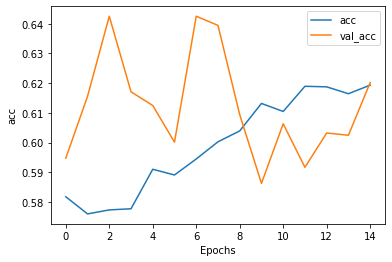

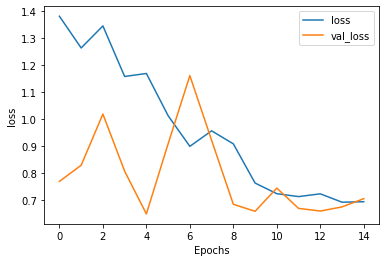

In [151]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "acc")
plot_graphs(history, "loss")